### Spaceship Titanic                      
#### Predict which passengers are transported to an alternate dimension

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!     

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Metric
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

Submission Format
The submission format for the competition is a csv file with the following format:

PassengerId,Transported                                 
0013_01,False          
0018_01,False               
0019_01,False               
0021_01,False                     
etc.

##### Libraries that might be useful 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from tabulate import tabulate
## import chart_studio.plotly as py
import os, glob 

In [3]:
headers=['passengerid','homeplanet','cryosleep','cabin','destination','age','vip','roomservice','foodcourt','shoppingmall','spa','vrdeck','name','transported']

In [4]:
df = pd.read_csv('train.csv' , names=headers, header=0)
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print(df.shape)
print(df.info())


(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [6]:
print(df.describe())

               age   roomservice     foodcourt  shoppingmall           spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             vrdeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [7]:
for i in headers:
    print(i)
    print(df[i].isna().sum())

passengerid
0
homeplanet
201
cryosleep
217
cabin
199
destination
182
age
179
vip
203
roomservice
181
foodcourt
183
shoppingmall
208
spa
183
vrdeck
188
name
200
transported
0


##### Drop all the NaNs for training purposes .... 

In [9]:
df = df.dropna()
df.shape

(6606, 14)

(array([1673.,    0.,    0.,    0.,    0., 3566.,    0.,    0.,    0.,
        1367.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

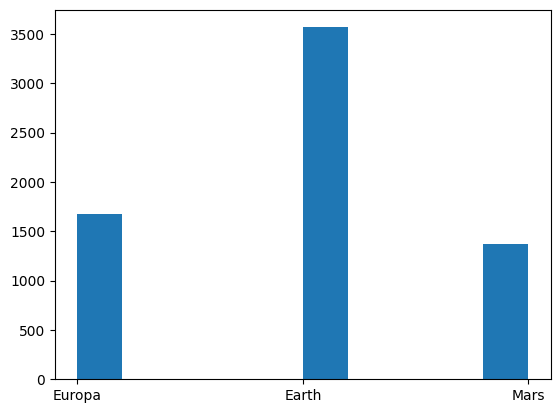

In [10]:
plt.hist(df['homeplanet'].astype('str'))

(array([4274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2332.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

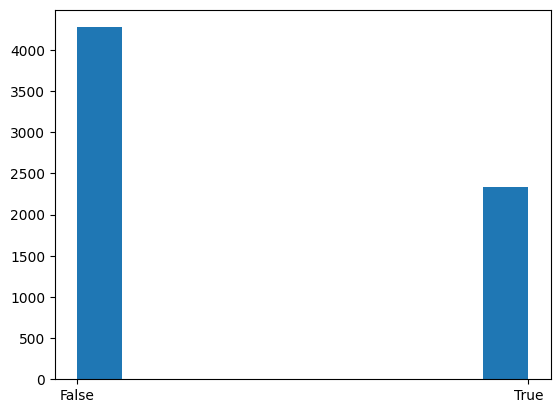

In [11]:
plt.hist(df['cryosleep'].astype('str'))

(array([4576.,    0.,    0.,    0.,    0.,  623.,    0.,    0.,    0.,
        1407.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

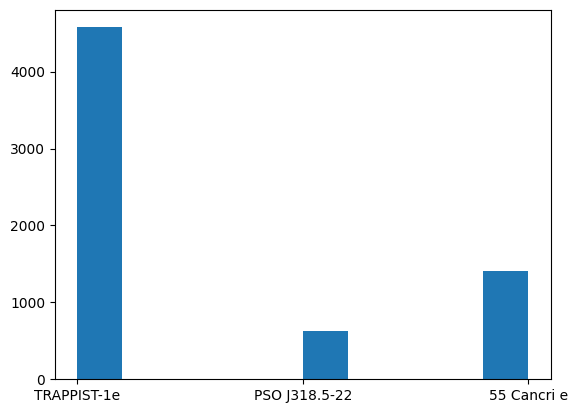

In [12]:
plt.hist(df['destination'].astype('str'))

(array([659., 675., 650., 652., 660., 660., 687., 649., 644., 670.]),
 array([   0. ,  530.4, 1060.8, 1591.2, 2121.6, 2652. , 3182.4, 3712.8,
        4243.2, 4773.6, 5304. ]),
 <BarContainer object of 10 artists>)

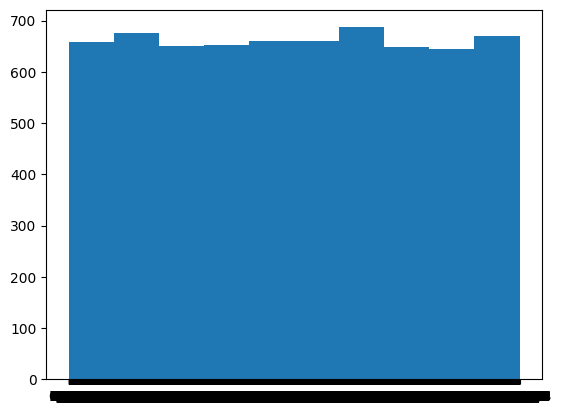

In [13]:
plt.hist(df['cabin'].astype('str'))
## figsize=(10, 10)

##### Label Encoder to classify the various object columns  

In [14]:
label_encoder = LabelEncoder()

In [15]:
col_encode=['homeplanet','cryosleep','destination','vip','transported']

for col in col_encode:
    df[col] = label_encoder.fit_transform(df[col])



In [16]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


##### And those Cabins .....

In [22]:
print(df['cabin'].nunique())

5305


In [23]:
df[['cabin1', 'cabin2', 'cabin3']] = df['cabin'].str.split('/', expand=True)

In [26]:
df.head()


,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,cabin1,cabin2,cabin3
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [27]:
df = df.drop('name', axis=1)

In [28]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,cabin1,cabin2,cabin3
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


##### Lets have a quick look at cabin 1,2,3 ..... 

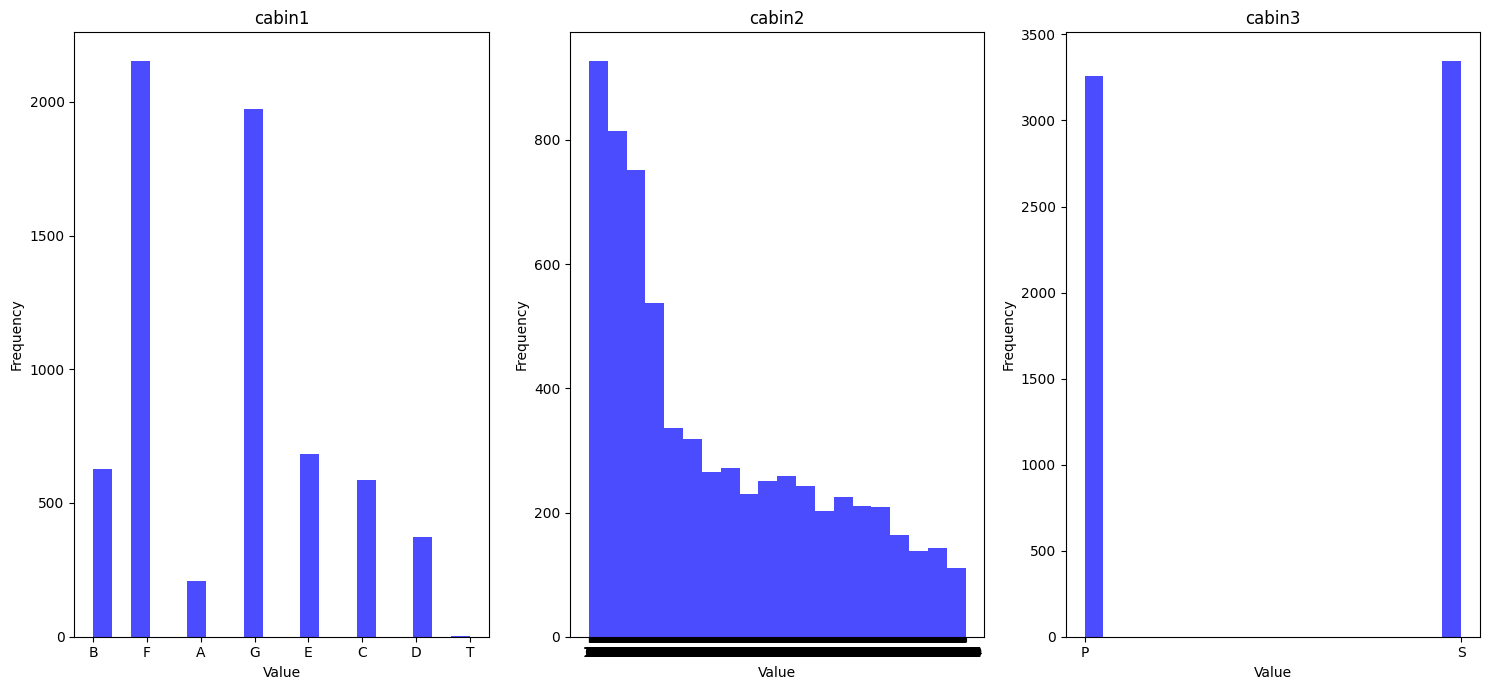

In [30]:
cabs=['cabin1','cabin2','cabin3']
# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Plotting histograms in each subplot
for i, column in enumerate(cabs):
    axes[i].hist(df[column], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
for col in cabs:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,cabin1,cabin2,cabin3
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [32]:
#### Drop cabin column
df = df.drop('cabin', axis=1)

In [36]:
df.describe()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,cabin1,cabin2,cabin3
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.667121,0.353012,1.479715,28.894036,0.024523,222.991674,478.958523,178.356494,313.161520,303.780048,0.503633,4.279140,901.413261,0.506358
std,0.797517,0.477943,0.821990,14.533429,0.154678,644.987936,1678.592291,576.328407,1144.016291,1127.142166,0.500025,1.792966,478.587409,0.499997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,495.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,936.000000,1.000000
75%,1.000000,1.000000,2.000000,38.000000,0.000000,49.000000,82.750000,30.000000,65.000000,52.000000,1.000000,6.000000,1272.750000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,1.000000,7.000000,1733.000000,1.000000


In [139]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
foodcourt,6606.000000,478.958523,1678.592291,0.000000,0.000000,0.000000,82.750000,29813.000000
spa,6606.000000,313.161520,1144.016291,0.000000,0.000000,0.000000,65.000000,22408.000000
vrdeck,6606.000000,303.780048,1127.142166,0.000000,0.000000,0.000000,52.000000,20336.000000
roomservice,6606.000000,222.991674,644.987936,0.000000,0.000000,0.000000,49.000000,9920.000000
shoppingmall,6606.000000,178.356494,576.328407,0.000000,0.000000,0.000000,30.000000,12253.000000
cabin2,6606.000000,901.413261,478.587409,0.000000,495.000000,936.000000,1272.750000,1733.000000
age,6606.000000,28.894036,14.533429,0.000000,19.000000,27.000000,38.000000,79.000000
cabin1,6606.000000,4.279140,1.792966,0.000000,3.000000,5.000000,6.000000,7.000000
destination,6606.000000,1.479715,0.821990,0.000000,1.000000,2.000000,2.000000,2.000000
homeplanet,6606.000000,0.667121,0.797517,0.000000,0.000000,0.000000,1.000000,2.000000


Funny :)

##### Normalize each of the columns - so they don't have more or less influence....  

In [34]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

Use MinMax to produce normalization between 0-1 

In [40]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame()

df['age_norm'] = scaler.fit_transform(df[['age']])

In [41]:
cols = ['homeplanet','cryosleep','destination','age','vip','roomservice','foodcourt','shoppingmall','spa','vrdeck','transported','cabin1','cabin2','cabin3']


# Fit and transform the column using MinMaxScaler
for col in cols:
   df[f'{col}_norm'] = scaler.fit_transform(df[[col]])


In [42]:
df.head()

,passengerid,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,...,vip_norm,roomservice_norm,foodcourt_norm,shoppingmall_norm,spa_norm,vrdeck_norm,transported_norm,cabin1_norm,cabin2_norm,cabin3_norm
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,...,0.0,0.010988,0.000302,0.002040,0.024500,0.002164,1.0,0.714286,0.000000,1.0
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,...,1.0,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,0.000000,0.000000,1.0
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,...,0.0,0.000000,0.043035,0.030278,0.148563,0.009491,0.0,0.000000,0.000000,1.0
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,...,0.0,0.030544,0.002348,0.012324,0.025214,0.000098,1.0,0.714286,0.000577,1.0


In [44]:
df_norm = df.drop(['homeplanet','cryosleep','destination','age','vip','roomservice','foodcourt','shoppingmall','spa','vrdeck','transported','cabin1','cabin2','cabin3'], axis=1)

In [45]:
df_norm.head()

,passengerid,age_norm,homeplanet_norm,cryosleep_norm,destination_norm,vip_norm,roomservice_norm,foodcourt_norm,shoppingmall_norm,spa_norm,vrdeck_norm,transported_norm,cabin1_norm,cabin2_norm,cabin3_norm
0,0001_01,0.493671,0.5,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.0
1,0002_01,0.303797,0.0,0.0,1.0,0.0,0.010988,0.000302,0.002040,0.024500,0.002164,1.0,0.714286,0.000000,1.0
2,0003_01,0.734177,0.5,0.0,1.0,1.0,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,0.000000,0.000000,1.0
3,0003_02,0.417722,0.5,0.0,1.0,0.0,0.000000,0.043035,0.030278,0.148563,0.009491,0.0,0.000000,0.000000,1.0
4,0004_01,0.202532,0.0,0.0,1.0,0.0,0.030544,0.002348,0.012324,0.025214,0.000098,1.0,0.714286,0.000577,1.0


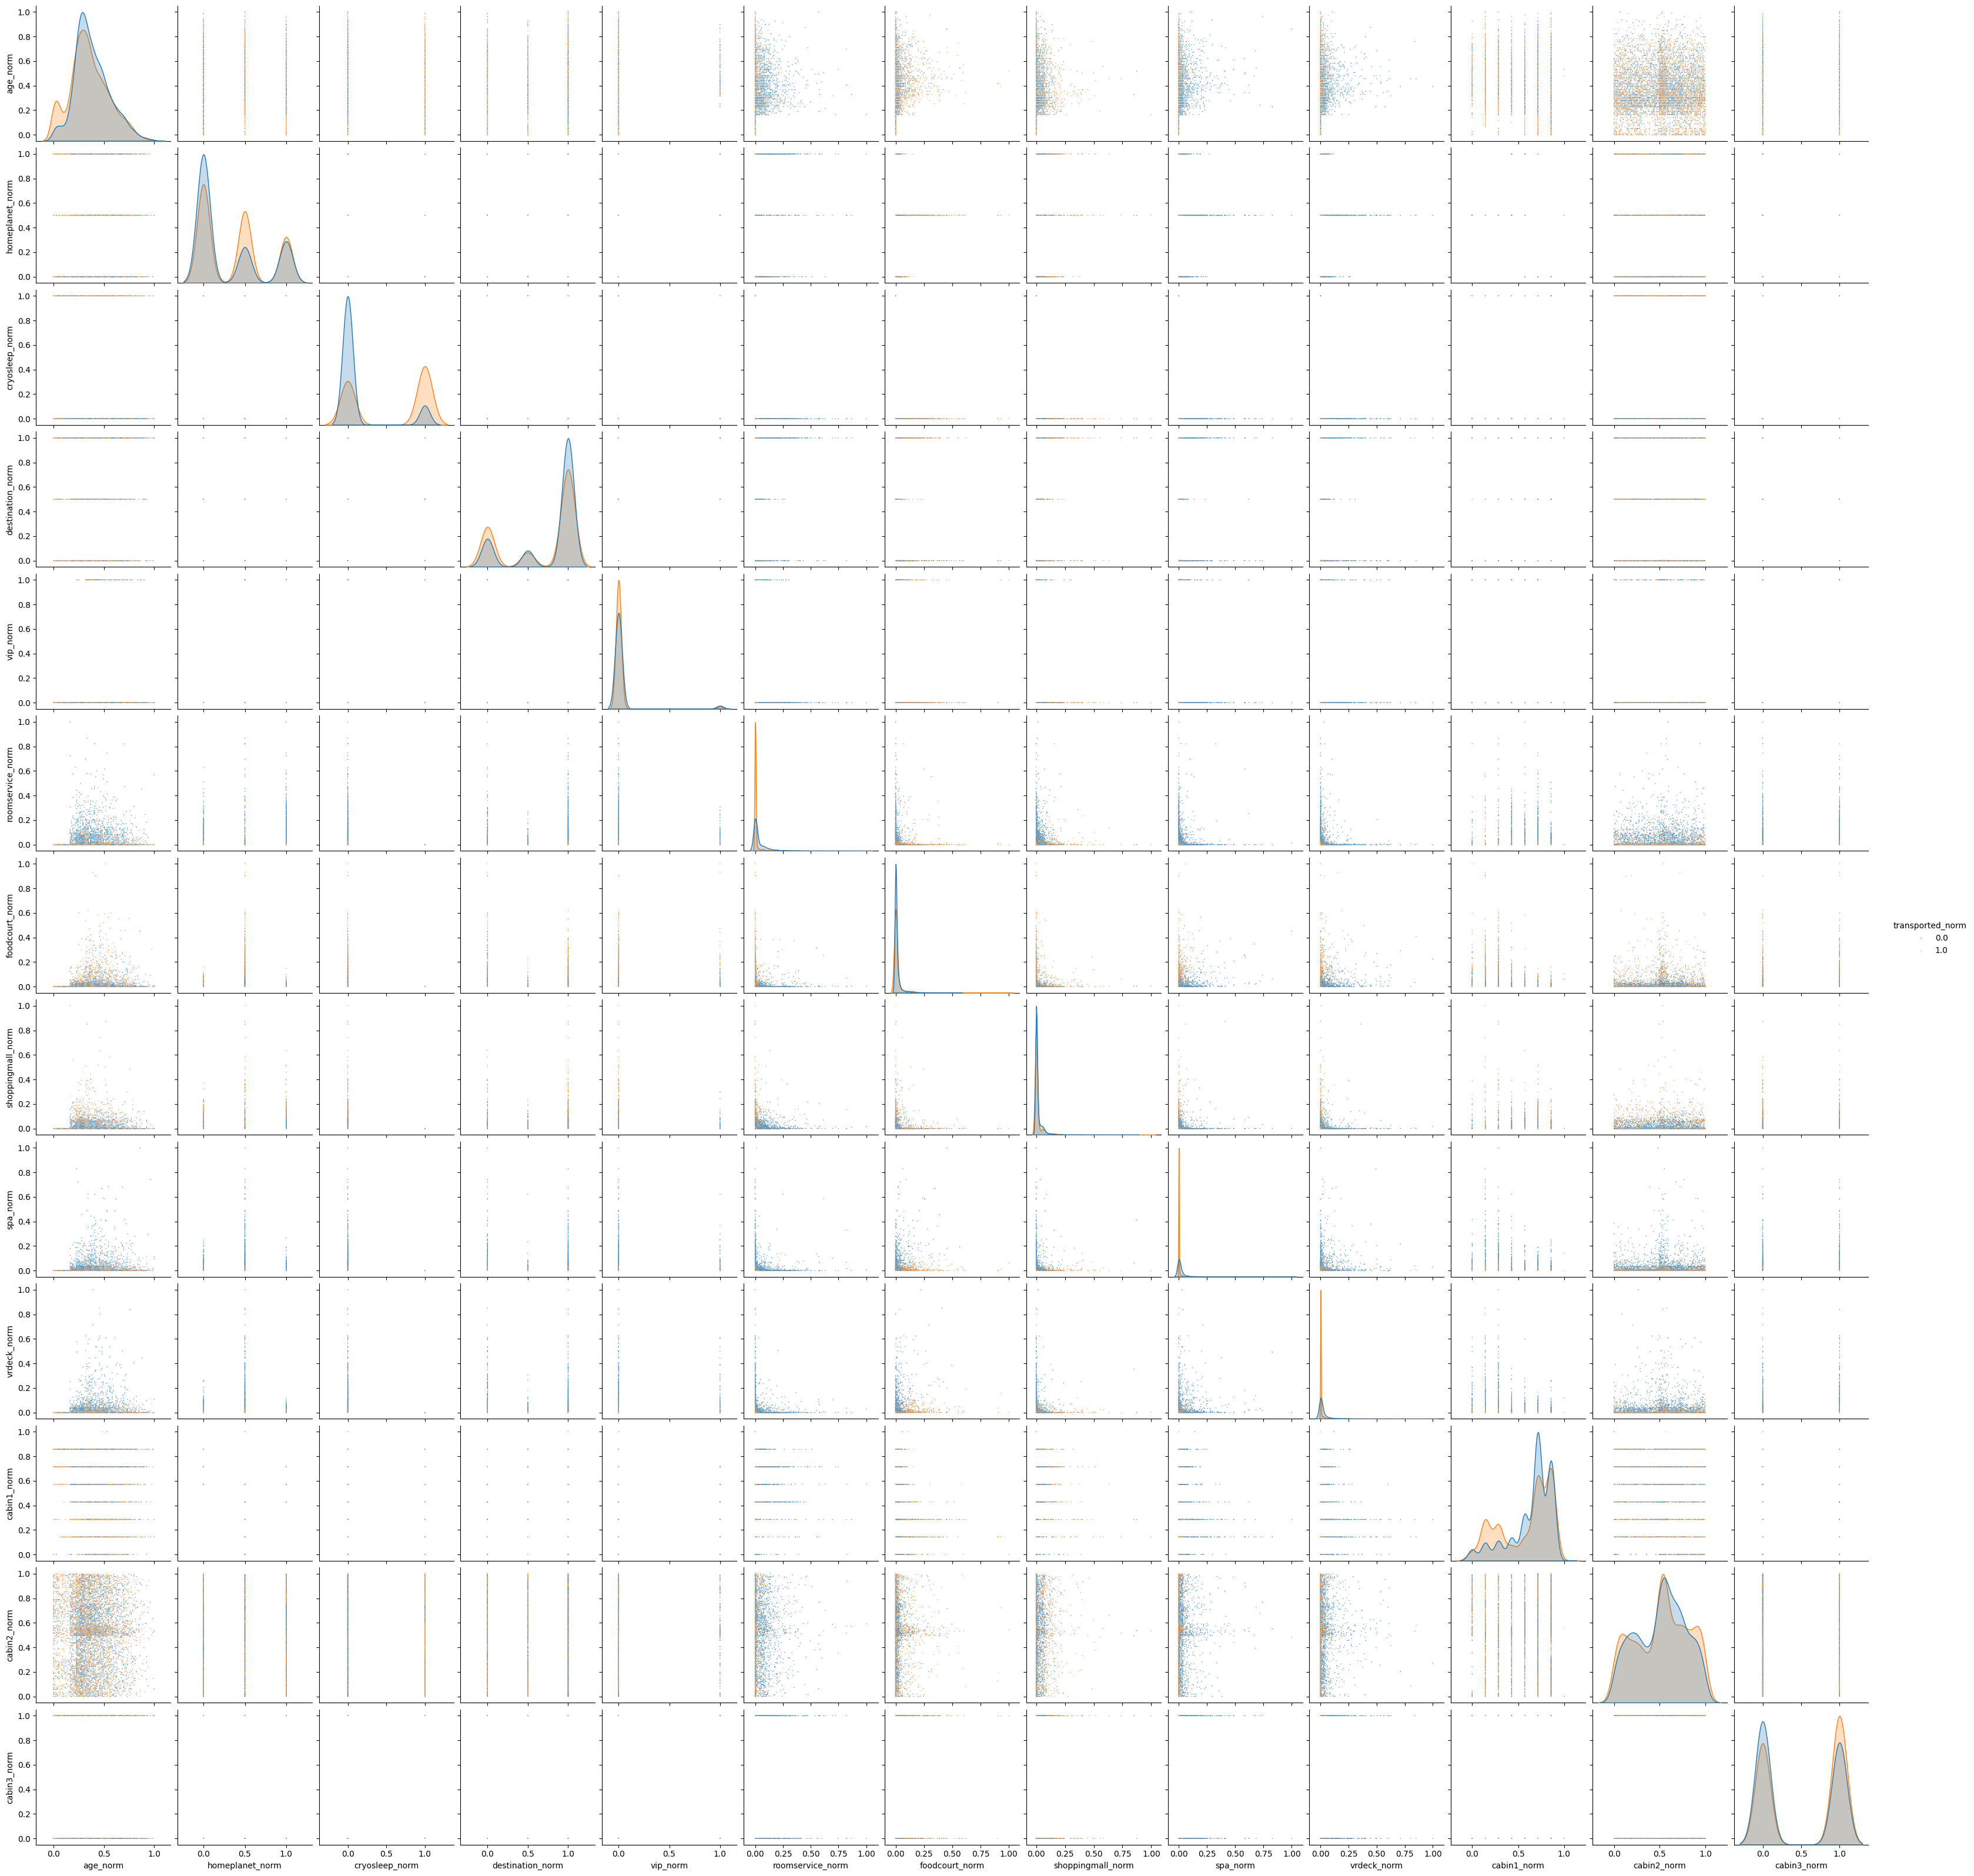

In [137]:
import seaborn as sns
sns.pairplot(df_norm, hue='transported_norm', plot_kws={'s': 1})

In [138]:
df_norm.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
transported_norm,6606.000000,0.503633,0.500025,0.000000,0.000000,1.000000,1.000000,1.000000
cryosleep_norm,6606.000000,0.353012,0.477943,0.000000,0.000000,0.000000,1.000000,1.000000
destination_norm,6606.000000,0.739858,0.410995,0.000000,0.500000,1.000000,1.000000,1.000000
homeplanet_norm,6606.000000,0.333560,0.398758,0.000000,0.000000,0.000000,0.500000,1.000000
cabin2_norm,6606.000000,0.520146,0.276161,0.000000,0.285632,0.540104,0.734420,1.000000
cabin1_norm,6606.000000,0.611306,0.256138,0.000000,0.428571,0.714286,0.857143,1.000000
age_norm,6606.000000,0.365747,0.183967,0.000000,0.240506,0.341772,0.481013,1.000000
vip_norm,6606.000000,0.024523,0.154678,0.000000,0.000000,0.000000,0.000000,1.000000
roomservice_norm,6606.000000,0.022479,0.065019,0.000000,0.000000,0.000000,0.004940,1.000000
foodcourt_norm,6606.000000,0.016065,0.056304,0.000000,0.000000,0.000000,0.002776,1.000000


Now we have a df with all the values between 0-1, we can split this between targets and variables for PCA

In [49]:
df_normX = df_norm.drop(['passengerid', 'transported_norm'], axis=1)
df_normY = df_norm[['passengerid', 'transported_norm']].copy()

In [50]:
df_normX.head()

,age_norm,homeplanet_norm,cryosleep_norm,destination_norm,vip_norm,roomservice_norm,foodcourt_norm,shoppingmall_norm,spa_norm,vrdeck_norm,cabin1_norm,cabin2_norm,cabin3_norm
0,0.493671,0.5,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0
1,0.303797,0.0,0.0,1.0,0.0,0.010988,0.000302,0.002040,0.024500,0.002164,0.714286,0.000000,1.0
2,0.734177,0.5,0.0,1.0,1.0,0.004335,0.119948,0.000000,0.299670,0.002410,0.000000,0.000000,1.0
3,0.417722,0.5,0.0,1.0,0.0,0.000000,0.043035,0.030278,0.148563,0.009491,0.000000,0.000000,1.0
4,0.202532,0.0,0.0,1.0,0.0,0.030544,0.002348,0.012324,0.025214,0.000098,0.714286,0.000577,1.0


In [51]:
df_normY.head()

,passengerid,transported_norm
0,0001_01,0.0
1,0002_01,1.0
2,0003_01,0.0
3,0003_02,0.0
4,0004_01,1.0


---

#### PCA dimension reduction   
Use PCA to reduce the number of dimensions - this will make the classification algorithm more accurate.    
We have 14 dimensions - so this should be useful ....  we'll  see.  

In [52]:
from sklearn.decomposition import PCA

In [53]:
def get_variance(X, n):
    pca = PCA(n_components=n)
    ## pca.fit(scaler.fit_transform(X))
    pca.fit((X))
    return pca.explained_variance_ratio_.cumsum()[-1:]

In [54]:
## Print the cumilative variance across 13 PCs 
for i in range(1,14):
    print('Components:\t', i, '=\t', get_variance(df_normX, i), 
          '\tCumulative Variance')

Components:	 1 =	 [0.24601852] 	Cumulative Variance
Components:	 2 =	 [0.47738855] 	Cumulative Variance
Components:	 3 =	 [0.65013564] 	Cumulative Variance
Components:	 4 =	 [0.81465031] 	Cumulative Variance
Components:	 5 =	 [0.88931532] 	Cumulative Variance
Components:	 6 =	 [0.93656922] 	Cumulative Variance
Components:	 7 =	 [0.9650244] 	Cumulative Variance
Components:	 8 =	 [0.9869108] 	Cumulative Variance
Components:	 9 =	 [0.99061565] 	Cumulative Variance
Components:	 10 =	 [0.99348289] 	Cumulative Variance
Components:	 11 =	 [0.99590701] 	Cumulative Variance
Components:	 12 =	 [0.99805805] 	Cumulative Variance
Components:	 13 =	 [1.] 	Cumulative Variance


Most of the variance can be explained by 5 components - so lets reduce the 14 dimensions down to 5 ...... 

In [55]:
## 5 Component PCA dim reduction - from 14 dims  
pca = PCA(n_components=5)
pca.fit(df_normX)
pcadfX = pca.transform(df_normX)
print("Original shape: {}".format(str(df_normX.shape)))
print("Reduced shape: {}".format(str(pcadfX.shape)))

Original shape: (6606, 13)
Reduced shape: (6606, 5)


Create a pca dataframe with all the information needed for training the model .... 

In [56]:
df_pca = df_normY[['passengerid', 'transported_norm']].copy()
for n in range (0, 5):
    df_pca[f'PCA{n}'] = pcadfX[:,n]

## df_pca = pd.DataFrame(pcadfX, columns =['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
 
print(df_pca.describe())
print(df_pca.head())

       transported_norm          PCA0          PCA1          PCA2  \
count       6606.000000  6.606000e+03  6.606000e+03  6.606000e+03   
mean           0.503633  9.680419e-18 -1.263832e-17  1.505843e-17   
std            0.500025  5.012525e-01  4.861007e-01  4.200278e-01   
min            0.000000 -6.276251e-01 -6.028656e-01 -6.825727e-01   
25%            0.000000 -5.630279e-01 -3.926019e-01 -3.521505e-01   
50%            1.000000  3.375951e-01 -1.937616e-01 -1.964613e-01   
75%            1.000000  4.020639e-01  5.040544e-01  3.794802e-01   
max            1.000000  7.352301e-01  1.041475e+00  8.772993e-01   

               PCA3          PCA4  
count  6.606000e+03  6.606000e+03  
mean  -3.657047e-17  4.302408e-17  
std    4.098973e-01  2.761412e-01  
min   -5.549741e-01 -4.949320e-01  
25%   -2.473315e-01 -2.147690e-01  
50%   -1.081950e-01 -2.178015e-02  
75%    2.338266e-01  2.325103e-01  
max    1.033015e+00  5.491897e-01  
  passengerid  transported_norm      PCA0      PCA1   

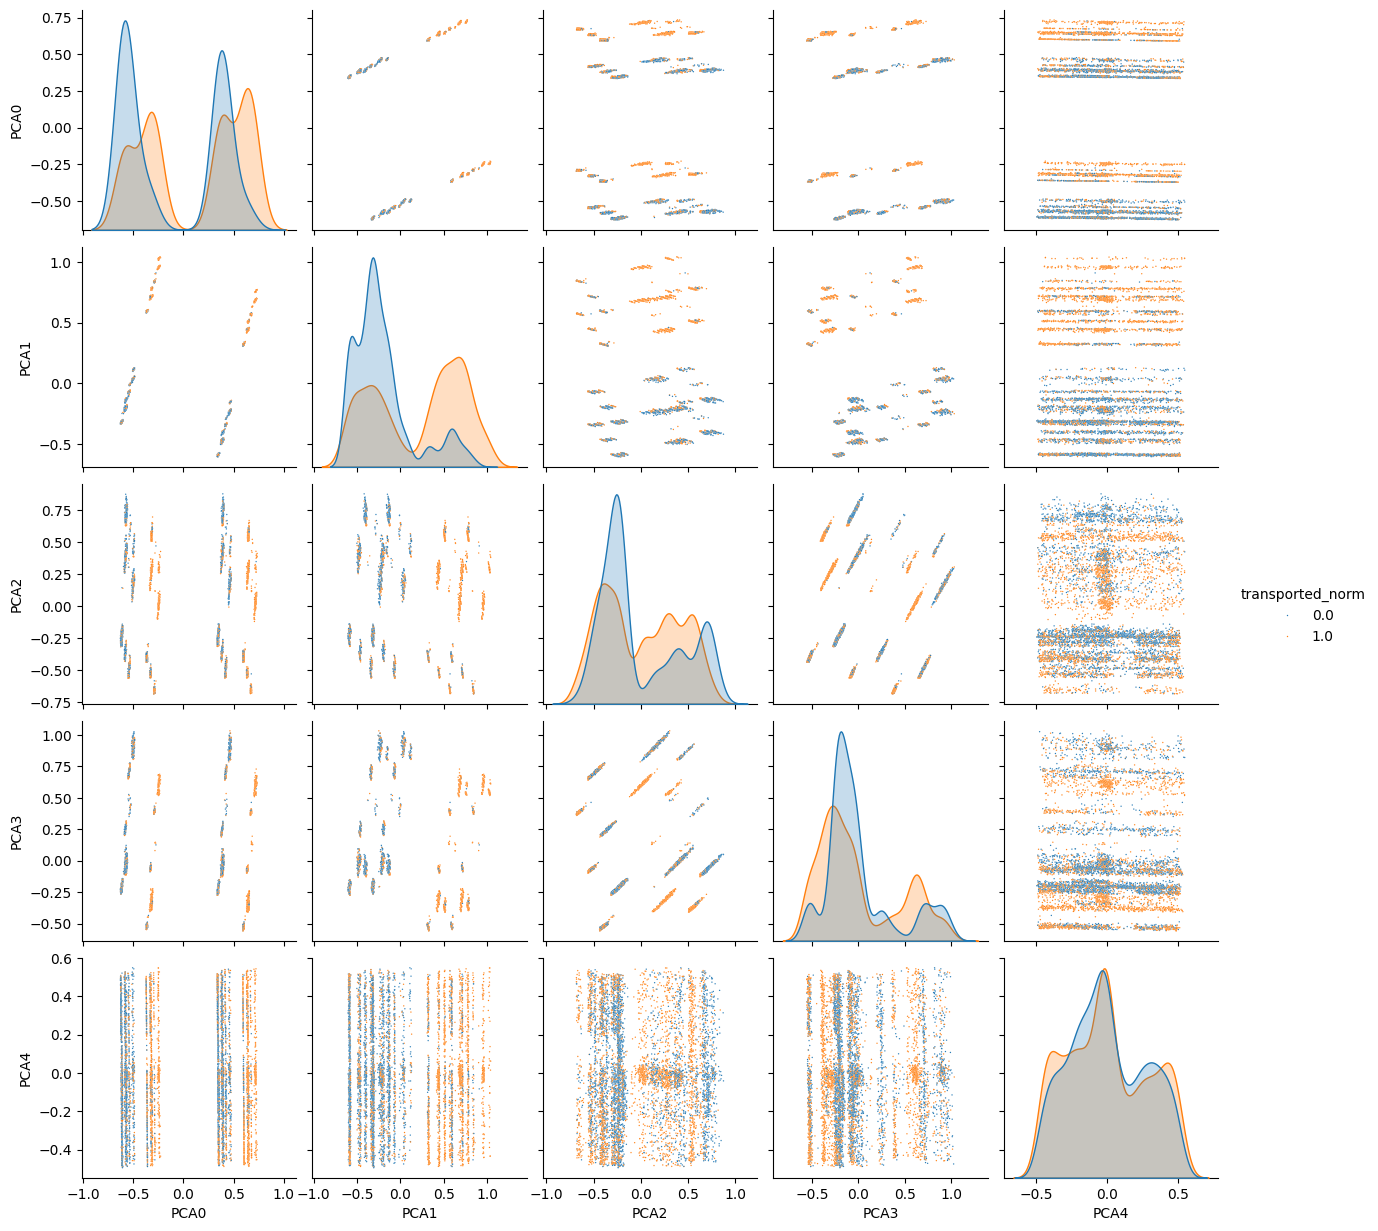

In [57]:
import seaborn as sns
sns.pairplot(df_pca, hue='transported_norm', plot_kws={'s': 1})

##### Create train and test (rather than validation) datasets from the known-ground classification 

In [60]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
y = df['transported']
X = df_pca[['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4']].copy()

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

---

##### Method 1: Logistic Regression  

In [65]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [66]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[685, 121],
       [334, 512]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

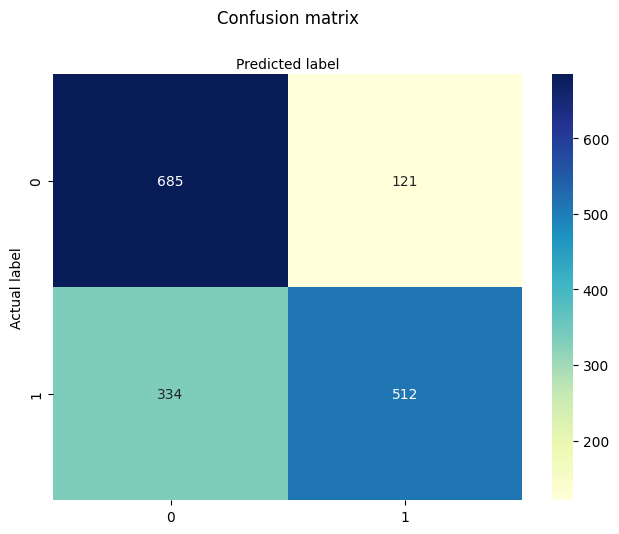

In [67]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [68]:
from sklearn.metrics import classification_report
target_names = ['not transported', 'transported']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

not transported       0.67      0.85      0.75       806
    transported       0.81      0.61      0.69       846

       accuracy                           0.72      1652
      macro avg       0.74      0.73      0.72      1652
   weighted avg       0.74      0.72      0.72      1652



##### Hmmm - not a very high f1-score .......      
Try a lower PCA 

In [69]:
## 5 Component PCA dim reduction - from 14 dims  
pca = PCA(n_components=2)
pca.fit(df_normX)
pcadfX = pca.transform(df_normX)
print("Original shape: {}".format(str(df_normX.shape)))
print("Reduced shape: {}".format(str(pcadfX.shape)))


Original shape: (6606, 13)
Reduced shape: (6606, 2)


In [70]:
df_pca2 = df_normY[['passengerid', 'transported_norm']].copy()
for n in range (0, 2):
    df_pca2[f'PCA{n}'] = pcadfX[:,n]

## df_pca = pd.DataFrame(pcadfX, columns =['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
 
print(df_pca2.describe())
print(df_pca2.head())

       transported_norm          PCA0          PCA1
count       6606.000000  6.606000e+03  6.606000e+03
mean           0.503633  2.124314e-17 -4.194848e-17
std            0.500025  5.012525e-01  4.861007e-01
min            0.000000 -6.276251e-01 -6.028656e-01
25%            0.000000 -5.630279e-01 -3.926019e-01
50%            1.000000  3.375951e-01 -1.937616e-01
75%            1.000000  4.020639e-01  5.040544e-01
max            1.000000  7.352301e-01  1.041475e+00
  passengerid  transported_norm      PCA0      PCA1
0     0001_01               0.0 -0.577798 -0.200464
1     0002_01               1.0  0.342195 -0.584204
2     0003_01               0.0  0.382123 -0.490731
3     0003_02               0.0  0.389553 -0.466307
4     0004_01               1.0  0.342156 -0.582674


In [71]:
y = df['transported']
X = df_pca2[['PCA0', 'PCA1']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [72]:
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
target_names = ['not transported', 'transported']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

not transported       0.67      0.85      0.75       806
    transported       0.81      0.60      0.69       846

       accuracy                           0.72      1652
      macro avg       0.74      0.73      0.72      1652
   weighted avg       0.74      0.72      0.72      1652



##### Very, very similar results with 2 components ..... 

##### Method 2: Decision Tree ..... 

In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.673728813559322


Lower than the logistical regression ..... 

In [78]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7197336561743342


__Meh__ 

##### Method 3: Random Forest ...... 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
y_pred = rf.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7033898305084746


**_YUK_**

In [86]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [87]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028AC18BE790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028ADD80DA90>})

In [88]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 180}


In [90]:
rf = RandomForestClassifier(max_depth=5, n_estimators=180 )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=180)

In [91]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7221549636803875


---

#### Repeat using 5 components ......  

In [93]:
y = df['transported']
X = df_pca[['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

##### Decision Tree

In [94]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7203389830508474


##### Random Forest

In [95]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028ADD84BA50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A82513510>})

In [96]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 308}


In [97]:
rf = RandomForestClassifier(max_depth=10, n_estimators=300 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7391041162227603


**74% is still not great**

##### Investigate more hyperparameters: 

In [109]:
criterion = ['gini', 'entropy'] 
max_features = ['log2', 'sqrt']

param_dist = {'criterion': criterion,
                'max_features': max_features,
                'n_estimators': randint(50,500),
                'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 389}


In [110]:
rf = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=390, max_features='sqrt' )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7415254237288136


##### Let's try a SVM

In [98]:
#Import svm model
from sklearn import svm

In [99]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7203389830508474


In [102]:
clf = svm.SVC(kernel='poly')   ## Try 'sigmoid', 'precomputed', 'linear', 'poly', 'rbf'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7203389830508474


Let's tune some hyperparameters..... this time use Grid Search: 

In [111]:
from sklearn.model_selection import GridSearchCV 
clf = svm.SVC()  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.725 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.717 total time=   1.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.708 total time=   1.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [112]:
# print best parameter after tuning 
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [113]:
clf = svm.SVC(C=1000, gamma=1, kernel='rbf', )   ## Try 'sigmoid', 'precomputed', 'linear', 'poly', 'rbf'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7318401937046005


##### Maybe Naive Bayes 

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [106]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7239709443099274
F1 Score: 0.7276994306655323


#### Try 7 components from PCA - covers over 96% of variance

In [114]:
## 5 Component PCA dim reduction - from 14 dims  
pca = PCA(n_components=7)
pca.fit(df_normX)
pcadfX = pca.transform(df_normX)
print("Original shape: {}".format(str(df_normX.shape)))
print("Reduced shape: {}".format(str(pcadfX.shape)))

Original shape: (6606, 13)
Reduced shape: (6606, 7)


In [116]:
df_pca7 = df_normY[['passengerid', 'transported_norm']].copy()
for n in range (0, 7):
    df_pca7[f'PCA{n}'] = pcadfX[:,n]

## df_pca = pd.DataFrame(pcadfX, columns =['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])
 
print(df_pca7.describe())
print(df_pca7.head())

       transported_norm          PCA0          PCA1          PCA2  \
count       6606.000000  6.606000e+03  6.606000e+03  6.606000e+03   
mean           0.503633  2.016754e-17  1.263832e-17  2.689005e-19   
std            0.500025  5.012525e-01  4.861007e-01  4.200278e-01   
min            0.000000 -6.276251e-01 -6.028656e-01 -6.825727e-01   
25%            0.000000 -5.630279e-01 -3.926019e-01 -3.521505e-01   
50%            1.000000  3.375951e-01 -1.937616e-01 -1.964613e-01   
75%            1.000000  4.020639e-01  5.040544e-01  3.794802e-01   
max            1.000000  7.352301e-01  1.041475e+00  8.772993e-01   

               PCA3          PCA4          PCA5          PCA6  
count  6.606000e+03  6.606000e+03  6.606000e+03  6.606000e+03  
mean  -2.151204e-17  4.732649e-17  1.156272e-17  1.452063e-17  
std    4.098973e-01  2.761412e-01  2.196805e-01  1.704721e-01  
min   -5.549741e-01 -4.949320e-01 -6.693817e-01 -5.873140e-01  
25%   -2.473315e-01 -2.147690e-01 -1.474358e-01 -1.136640e

In [117]:
y = df['transported']
X = df_pca7[['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [125]:
X_train

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
4283,0.713291,0.687358,-0.022548,0.577919,0.135102,0.064225,-0.180075
615,0.384545,-0.487327,0.423439,-0.010648,-0.022147,0.443033,0.442907
6892,0.337594,-0.593814,-0.267288,-0.247240,0.403453,-0.026218,0.128113
1954,-0.612254,-0.310631,-0.236137,-0.201288,-0.132024,0.026156,-0.080430
8294,-0.318265,0.782051,0.533190,-0.376382,0.057436,-0.264341,-0.028630
...,...,...,...,...,...,...,...
6021,0.336678,-0.591842,-0.278516,-0.254750,0.495711,-0.065563,0.023567
846,0.594439,0.322835,-0.410309,-0.538460,0.292096,-0.018574,-0.038084
1803,0.672674,0.569974,-0.649593,0.386088,-0.022709,-0.190108,0.064638
771,0.388086,-0.393405,0.630683,-0.121214,0.230046,-0.468041,-0.273220


In [118]:
rf = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=390, max_features='sqrt' )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7451573849878934


A small increase ..... baby steps .......

In [119]:
criterion = ['gini', 'entropy'] 
max_features = ['log2', 'sqrt']

param_dist = {'criterion': criterion,
                'max_features': max_features,
                'n_estimators': randint(50,500),
                'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 435}


In [120]:
rf = RandomForestClassifier(criterion='gini', max_depth=17, n_estimators=435, max_features='sqrt' )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7415254237288136


Worse with hyperparameterisation :)))))

---

##### Ok time for something a little more advanced - TensorFlow Decision Forests (TFDF) 

__lol - TensorFlow Decision Forests is not yet available as a Windows Pip package__ 

In [ ]:
import tensorflow_decision_forests as tfdf

In [126]:
X_train['transported'] = y_train
X_train.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,transported
4283,0.713291,0.687358,-0.022548,0.577919,0.135102,0.064225,-0.180075,1
615,0.384545,-0.487327,0.423439,-0.010648,-0.022147,0.443033,0.442907,0
6892,0.337594,-0.593814,-0.267288,-0.247240,0.403453,-0.026218,0.128113,1
1954,-0.612254,-0.310631,-0.236137,-0.201288,-0.132024,0.026156,-0.080430,1
8294,-0.318265,0.782051,0.533190,-0.376382,0.057436,-0.264341,-0.028630,1


In [127]:
X_test['transported'] = y_test
X_test.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,transported
1310,0.671535,0.565420,-0.630984,0.395276,0.034303,-0.114513,0.237561,1
3561,0.420205,-0.343129,-0.511593,0.679605,-0.226293,-0.234182,0.175726,0
4955,0.354886,-0.577647,-0.172893,-0.167357,-0.077940,0.185004,0.018272,1
1488,0.343763,-0.584699,-0.293586,-0.254476,-0.009270,-0.147921,-0.123571,0
5909,-0.617853,-0.314057,-0.235315,-0.205753,0.322475,0.062210,-0.063778,1


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label="transported")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label="transported")

##### GradientBoostingClassifier

In [128]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
X_train = X_train.drop(['transported'], axis=1)
X_test = X_test.drop(['transported'], axis=1)

In [133]:
for n in range(1,10):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=n, random_state=16).fit(X_train, y_train)
    print(f'score for n={n} is:', clf.score(X_test, y_test))

score for n=1 is: 0.7330508474576272
score for n=2 is: 0.7142857142857143
score for n=3 is: 0.7142857142857143
score for n=4 is: 0.6973365617433414
score for n=5 is: 0.7058111380145279
score for n=6 is: 0.6955205811138014
score for n=7 is: 0.6924939467312349
score for n=8 is: 0.7088377723970944
score for n=9 is: 0.7088377723970944


In [134]:
lr=[0.4,0.8,1.2,1.6,2.0]
for n in lr:
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=n, max_depth=1, random_state=16).fit(X_train, y_train)
    print(f'score for n={n} is:', clf.score(X_test, y_test))

score for n=0.4 is: 0.7306295399515739
score for n=0.8 is: 0.7318401937046005
score for n=1.2 is: 0.7324455205811138
score for n=1.6 is: 0.7197336561743342
score for n=2.0 is: 0.6979418886198547


In [135]:
est=[50,100,150,200,300,500,1000]
for n in est:
    clf = GradientBoostingClassifier(n_estimators=n, learning_rate=1, max_depth=1, random_state=16).fit(X_train, y_train)
    print(f'score for n={n} is:', clf.score(X_test, y_test))

score for n=50 is: 0.7336561743341404
score for n=100 is: 0.7330508474576272
score for n=150 is: 0.7276029055690073
score for n=200 is: 0.7263922518159807
score for n=300 is: 0.7257869249394673
score for n=500 is: 0.7336561743341404
score for n=1000 is: 0.7263922518159807


In [136]:
est=[5,10,15,20,30,50,100]
for n in est:
    clf = GradientBoostingClassifier(n_estimators=n, learning_rate=1, max_depth=1, random_state=16).fit(X_train, y_train)
    print(f'score for n={n} is:', clf.score(X_test, y_test))

score for n=5 is: 0.7294188861985472
score for n=10 is: 0.7342615012106537
score for n=15 is: 0.7397094430992736
score for n=20 is: 0.7372881355932204
score for n=30 is: 0.7318401937046005
score for n=50 is: 0.7336561743341404
score for n=100 is: 0.7330508474576272


None of these are as good as the Random Forest ..... 

##### Well .... I've just discovered lazy-predict 

In [140]:
from lazypredict.Supervised import LazyClassifier

In [141]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:25<00:00,  1.15it/s]

[LightGBM] [Info] Number of positive: 2481, number of negative: 2473
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 4954, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500807 -> initscore=0.003230
[LightGBM] [Info] Start training from score 0.003230
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.74               0.75     0.75      0.74   
LGBMClassifier                     0.74               0.74     0.74      0.74   
SVC                                0.74               0.74     0.74      0.74   
NearestCentroid                    0.73               0.73     0.73      0.73   
AdaBoostClassifier        

#### Let's try without the PCa - crazy huh?? 

In [159]:
y1 = df_normY['transported_norm']
X1 = df_normX
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=8)

In [160]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:24<00:00,  1.53it/s]

[LightGBM] [Info] Number of positive: 3009, number of negative: 2936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 5945, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506140 -> initscore=0.024560
[LightGBM] [Info] Start training from score 0.024560


100%|██████████| 29/29 [00:24<00:00,  1.16it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.82     0.82      0.82   
LGBMClassifier                     0.82               0.82     0.82      0.82   
XGBClassifier                      0.81               0.81     0.81      0.81   
ExtraTreesClassifier               0.81               0.81     0.81      0.81   
SVC                                0.81               0.81     0.81      0.81   
NuSVC                              0.81               0.81     0.81      0.81   
KNeighborsClassifier               0.80               0.79     0.79      0.80   
LinearSVC                          0.79               0.79     0.79      0.79   
CalibratedClassifierCV             0.79               0.79     0.79      0.79   
BaggingClassifier                  0.79               0.79     0.79      0.79   
AdaBoostClassifier          

### So, the accuracy of the classifiers is much higher without PCA .... who knew!?! 

##### Try SVC again ...

In [164]:
from sklearn.model_selection import GridSearchCV 
clf = svm.SVC()  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}                            ## Try 'sigmoid', 'precomputed', 'linear', 'poly', 'rbf'
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=   1.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   1.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   1.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   1.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   1.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.706 total time=   2.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.730 total time=   2.3s
[CV 3/5] END .....C=0.1, gam

In [161]:
clf = svm.SVC(C=100, gamma=0.1, kernel='rbf', )   
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8033282904689864


In [162]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[273,  70],
       [ 60, 258]], dtype=int64)

##### AdaBoostClassifier

In [156]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.svm import SVC

In [163]:
## svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7881996974281392
